<a href="https://colab.research.google.com/github/julianovale/MCDA/blob/main/0001_MCDA_Promethee2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Filename: PROMETHEE_Preference_Functions.py
# Description: This module calculates the
# unicriterion preference degrees of the actions
# for a specific criterion
# Authors: Papathanasiou, J. & Ploskas, N.

from numpy import *

# Calculate the unicriterion preference degrees
def uni_cal(x, p, c, f):
    """ x is the action performances array, p is the
    array with the preference parameters of all 
	criteria, c is the criteria min (0) or max (1) 
	optimization array, and f is the preference 
	function array for a specific criterion ('u' 
	for usual, 'us' for u-shape, 'vs' for v-shape, 
	'le' for level, 'li' for linear, and 'g' for 
	Gaussian)
    """
    uni = zeros((x.shape[0], x.shape[0]))
    for i in range(size(uni, 0)):
        for j in range(size(uni, 1)):
            if i == j:
                uni[i, j] = 0
            elif f == 'u':  # Usual preference function
                if x[j] - x[i] > 0:
                    uni[i, j] = 1
                else:
                    uni[i, j] = 0
            elif f == 'us': # U-shape preference function
                if x[j] - x[i] > x[0]:
                    uni[i, j] = 1
                elif x[j] - x[i] <= p[0]:
                    uni[i, j] = 0
            elif f == 'vs': # V-shape preference function
                if x[j] - x[i] > p[1]:
                    uni[i, j] = 1
                elif x[j] - x[i] <= 0:
                    uni[i, j] = 0
                else:
                    uni[i, j] = (x[j] - x[i]) / p[1]
            elif f == 'le': # Level preference function
                if x[j] - x[i] > p[1]:
                    uni[i, j] = 1
                elif x[j] - x[i] <= p[0]:
                    uni[i, j] = 0
                else:
                    uni[i, j] = 0.5
            elif f == 'li': # Linear preference function
                if x[j] - x[i] > p[1]:
                    uni[i, j] = 1
                elif x[j] - x[i] <= p[0]:
                    uni[i, j] = 0
                else:
                    uni[i, j] = ((x[j] - x[i]) -
                        p[0]) / (p[1] - p[0])
            elif f == 'g':  # Gaussian preference function
                if x[j] - x[i] > 0:
                    uni[i, j] = 1 - math.exp(-(math.pow(x[j]
                        - x[i], 2) / (2 * p[1] ** 2)))
                else:
                    uni[i, j] = 0
    if c == 0:
        uni = uni
    elif c == 1:
        uni = uni.T
    # positive, negative and net flows
    pos_flows = sum(uni, 1) / (uni.shape[0] - 1)
    neg_flows = sum(uni, 0) / (uni.shape[0] - 1)
    net_flows = pos_flows - neg_flows
    return net_flows

In [2]:
# Filename: PROMETHEE_Final_Rank_Figure.py
# Description: Optional module to plot the
# results of PROMETHEE method
# Authors: Papathanasiou, J. & Ploskas, N.

import matplotlib.pyplot as plt
from graphviz import Digraph
from numpy import *

# Plot final rank figure
def graph(flows, b):
    """ flows is the matrix with the net flows, and b
    is a string describing the net flow
    """
    s = Digraph('Actions', node_attr = {'shape':
        'plaintext'})
    s.body.extend(['rankdir = LR'])
    x = sort(flows)
    y = argsort(flows)
    l = []
    for i in y:
        s.node('action' + str(i), '''<
        <TABLE BORDER="0" CELLBORDER="1"
            CELLSPACING="0" CELLPADDING="4">
          <TR>
            <TD COLSPAN="2" bgcolor="grey" >Action
                ''' + str(y[i] + 1) + '''</TD>
          </TR>
          <TR>
            <TD>'''+ b +'''</TD>
            <TD>''' + str(x[i]) + '''</TD>
          </TR>
        </TABLE>>''')
    k = []
    for q in range(len(flows) - 1):
        k.append(['action' + str(q + 1), 'action'
            + str(q)])
    print(k)
    s.edges(k)
    s.view()

# Plot final rank
def plot(a, b):
    """ a is the matrix with the net flows, and b
    is a string describing the method
    """
    flows = a
    yaxes_list = [0.2] * size(flows, 0)
    plt.plot(yaxes_list, flows, 'ro')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    plt.axis([0, 0.7, min(flows) - 0.05,
        max(flows) + 0.05])
    plt.title(b + " results")
    plt.ylabel("Flows")
    plt.legend()
    plt.grid(True)
    z1 = []
    for i in range(size(flows, 0)):
        z1.append('   (Action ' + str(i + 1) + ')')
    z = [str(a) + b for a, b in zip(flows, z1)]
    for X, Y, Z in zip(yaxes_list, flows, z):
        plt.annotate('{}'.format(Z), xy = (X, Y),
            xytext=(10, -4), ha = 'left',
            textcoords = 'offset points')
    plt.show()

No handles with labels found to put in legend.


Global preference flows =  [-0.26 -0.52 -0.22  0.36  0.7  -0.06]


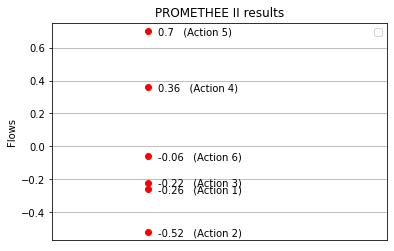

In [3]:
# Filename: PROMETHEE_II.py
# Description: PROMETHEE II method
# Authors: Papathanasiou, J. & Ploskas, N.

# PROMETHEE method: it calls the other functions
def promethee(x, p, c, d, w):
    """ x is the action performances array, b is the
    array with the preference parameters of all 
	criteria, c is the criteria min (0) or max (1) 
	optimization array, d is the preference 
	function array ('u' for usual, 'us' for 
	u-shape, 'vs' for v-shape, 'le' for level, 
	'li' for linear, and 'g' for Gaussian), and w
    is the weights array
    """
    weighted_uni_net_flows = []
    total_net_flows = []
    for i in range(x.shape[1]):
        weighted_uni_net_flows.append(w[i] *
            uni_cal(x[:, i:i + 1], p[:,
            i:i + 1], c[i], d[i]))
	
    # print the weighted unicriterion preference
    # net flows
    for i in range(size(weighted_uni_net_flows, 1)):
        k = 0
        for j in range(size(weighted_uni_net_flows, 0)):
            k = k + round(weighted_uni_net_flows[j][i], 5)
        total_net_flows.append(k)
    return around(total_net_flows, decimals = 4)

# main function
def main(a, b):
    """ a and b are flags; if they are set to 'y' they do
    print the results, anything else does not print
    the results
	"""

    # action performances array
    x = array([[8, 7, 2, 1], [5, 3, 7, 5], [7, 5, 6, 4],
        [9, 9, 7, 3], [11, 10, 3, 7], [6, 9, 5, 4]])

    # preference parameters of all criteria array
    p = array([[1, 1, 1, 1], [2, 2, 2, 2]])

    # criteria min (0) or max (1) optimization array
    c = ([1, 1, 1, 1])

    # preference function array
    d = (['li', 'li', 'li', 'li'])

    # weights of criteria
    w = array([0.4, 0.3, 0.1, 0.2])

    # final results
    final_net_flows = promethee(x, p, c, d, w)
    print("Global preference flows = ", final_net_flows)
    if a == 'y':
        graph(final_net_flows, "Phi")
    if b == 'y':
        plot(final_net_flows, "PROMETHEE II")
    return final_net_flows

if __name__ == '__main__':
    main('n','y')